# BonzaPlot

### Robert Cameron, March 2016

In [4]:
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime as dt
%matplotlib inline
plt.rc('figure', figsize = [16, 16])
plt.rc('font', size = 18)

In [5]:
# read regular ASCII tabular file of data

datafile = "/Users/rc/Documents/GLAST/ISOC/LATmetrics/orbit/orbit-history.txt"
datab = Table.read(datafile, format = 'ascii')

In [7]:
datab

Year,DayOfYear,Orbit,MeanMot(o/d),MMdot,Period(m),SemiMajor(km),Alt,Inclin,Eccen,RAAN,MeanAnom,ArgPer,PrecRate,PrecPer(d)
int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2008,163.87398774,3,15.04844223,2.78e-06,95.69097,6930.1209,552.121,25.5885,0.0013926,323.4829,264.4587,213.3784,-6.72112,53.562
2008,163.65550884,0,15.59411756,1.967e-05,92.34251,6767.4954,389.495,28.5143,0.0294805,323.9476,221.9886,140.279,-7.12791,50.506
2008,163.78597929,2,15.0484238,2.78e-06,95.69108,6930.1265,552.127,25.5874,0.0013824,324.0757,147.6708,212.3774,-6.72117,53.562
2008,163.85227622,3,15.04844786,2.78e-06,95.69093,6930.1192,552.119,25.588,0.0013841,323.6291,146.7275,213.2401,-6.72116,53.562
2008,164.78063385,17,15.04849942,2.78e-06,95.6906,6930.1033,552.103,25.5869,0.001396,317.372,136.0938,223.8528,-6.72127,53.561
2008,165.0458783,21,15.04849822,2.78e-06,95.69061,6930.1037,552.104,25.5865,0.0013936,315.5844,133.056,226.8805,-6.72129,53.561
2008,165.77530302,32,15.04850287,2.78e-06,95.69058,6930.1023,552.102,25.586,0.0013863,310.6688,124.4932,235.4327,-6.72133,53.561
2008,166.43841602,42,15.04850336,2.78e-06,95.69058,6930.1021,552.102,25.5861,0.001387,306.2008,116.8529,243.0593,-6.72132,53.561
2008,166.70366149,46,15.04850429,2.78e-06,95.69057,6930.1018,552.102,25.5856,0.0013868,304.4133,113.7302,246.1791,-6.72135,53.561


In [2]:
# read regular ASCII tabular file of beta angle history
betafile = "/Users/rc/Documents/GLAST/ISOC/LATmetrics/beta/betang.txt"
betatab = Table.read(betafile, format='ascii')
bymd = betatab['YMD']
bhms = betatab['HMS']
bxformat = "%Y-%m-%d%H:%M:%S"
bx = [dt.datetime.strptime(bymd[i]+bhms[i],bxformat) for i in range(len(bymd))]

In [3]:
# read irregular ASCII tabular file of history of VCHP control
htrfile = "/Users/rc/Documents/GLAST/ISOC/LATmetrics/LTC/htr.history"
df = pd.read_csv(htrfile, parse_dates=[1], delimiter="\t",header=None)
(hymd,tot0,off0,tot6,off6,tot7,off7) = (df[0],df[2],df[3],df[5],df[6],df[8],df[9])

ok = (tot0 > 0) & (tot6 > 0) & (tot7 > 0)

hymd = hymd[ok]
tot0 = tot0[ok]
off0 = off0[ok]
tot6 = tot6[ok]
off6 = off6[ok]
tot7 = tot7[ok]
off7 = off7[ok]
f0 = off0/tot0
f6 = off6/tot6
f7 = off7/tot7
VCHP0 = 1-pd.rolling_window(f0,20,win_type='boxcar',center='True')
VCHP6 = 1-pd.rolling_window(f6,20,win_type='boxcar',center='True')
VCHP7 = 1-pd.rolling_window(f7,20,win_type='boxcar',center='True')

fx = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in hymd]
captionx = dt.date(2010,3,1)

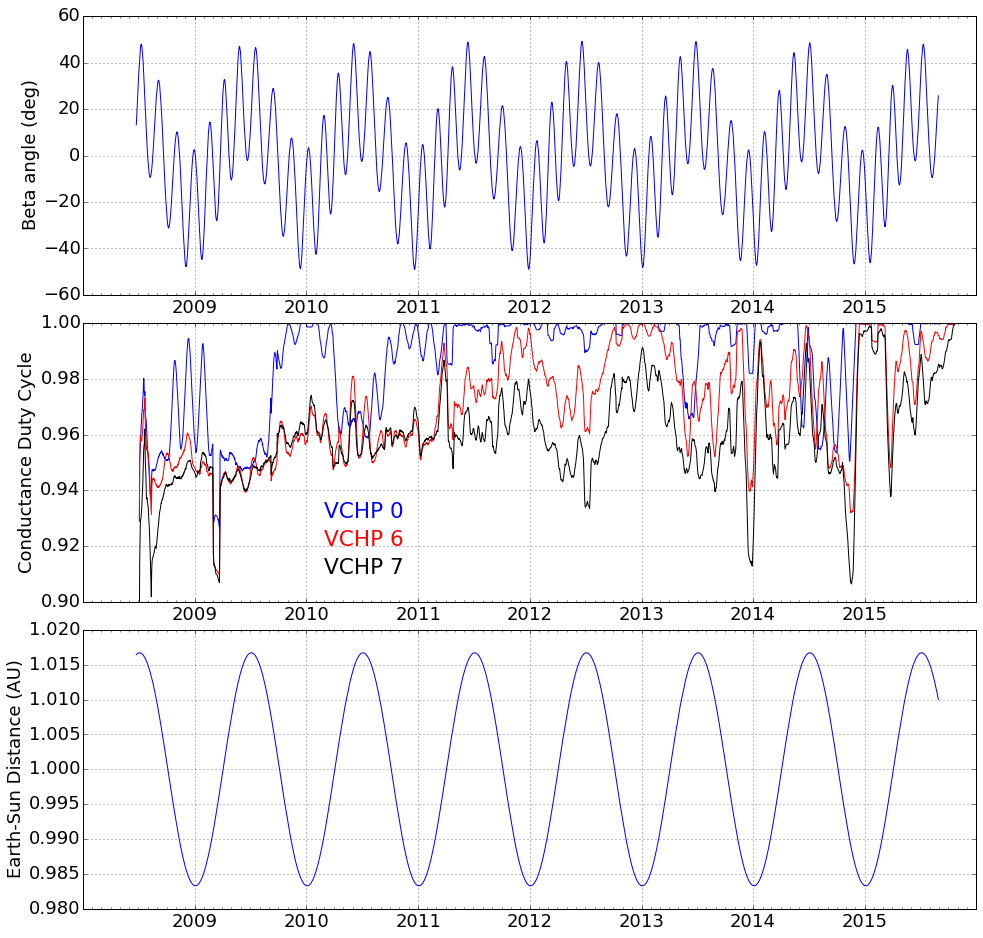

In [4]:
# 3 subplots for beta, VCHP, rAU, where the axes array is 1-d

#fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig, (ax1, ax2, ax3) = plt.subplots(3)

years    = mdates.YearLocator()   # every year
months   = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ax1.plot(bx, betatab['beta'])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_minor_locator(months)

#datemin = dt.date(int(yb[0]), 1, 1)
#datemax = dt.date(int(yb[-1])+1, 1, 1)
datemin = dt.date(2008, 1, 3)
datemax = dt.date(2015, 12, 31)
ax1.set_xlim(datemin, datemax)
ax1.grid(True)
ax1.set_ylabel('Beta angle (deg)')

ax2.plot(fx,VCHP0,'-b',label='VCHP0')
ax2.plot(fx,VCHP6,'-r',label='VCHP6')
ax2.plot(fx,VCHP7,'-k',label='VCHP7')
ax2.grid(True)
ax2.set_xlim(datemin, datemax)
ax2.xaxis.set_minor_locator(months)
ax2.set_ylim(0.9,1.0)
#ax2.legend(loc='lower center',fontsize='small')
ax2.set_ylabel('Conductance Duty Cycle')
ax2.text(captionx,0.93,"VCHP 0",color='b',fontsize='large')
ax2.text(captionx,0.92,"VCHP 6",color='r',fontsize='large')
ax2.text(captionx,0.91,"VCHP 7",color='k',fontsize='large')

ax3.plot(bx, betatab['rAU'])
ax3.grid(True)
ax3.xaxis.set_minor_locator(months)
ax3.set_xlim(datemin, datemax)
ax3.set_ylabel('Earth-Sun Distance (AU)')

fig.subplots_adjust(hspace=0.1)
#fig.autofmt_xdate()